# Hierarchial Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
Airlines=pd.read_csv("D:\\ExcelR Assignments\\Clustering\\EastWestAirlines.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
EWA=Airlines.iloc[:,1:]
EWA.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
EWA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [15]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [16]:
EWA_norm=minmax_func(EWA)
EWA_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


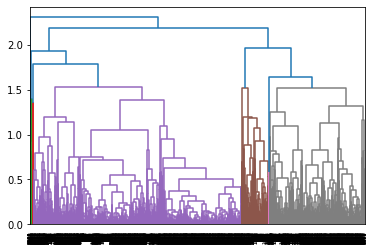

In [17]:
dendrogram=sch.dendrogram(sch.linkage(EWA_norm,method='complete'))

In [31]:
hc=AgglomerativeClustering(n_clusters=16,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=16)

In [32]:
y_hc=hc.fit_predict(EWA_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [33]:
Clusters.value_counts()

Clusters
7           983
8           952
3           536
4           386
10          287
15          285
5           266
14          189
6            44
2            31
0            15
1            11
9             4
12            4
13            4
11            2
dtype: int64

In [34]:
y_hc

array([8, 8, 8, ..., 3, 7, 7], dtype=int64)

In [35]:
EWA_norm['h_clusterid']=y_hc
EWA_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,8
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,8
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,8
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,8
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,10
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,10
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,3
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,7


In [36]:
EWA['h_clusterid']=y_hc
EWA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,8
1,19244,0,1,1,1,215,2,0,0,6968,0,8
2,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,14776,0,1,1,1,500,1,0,0,6952,0,8
4,97752,0,4,1,1,43300,26,2077,4,6935,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,10
3995,64385,0,1,1,1,981,5,0,0,1395,1,10
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,7


# KMeans Clustering

In [37]:
from sklearn.cluster import KMeans

In [38]:
Airlines1=pd.read_csv("D:\\ExcelR Assignments\\Clustering\\EastWestAirlines.csv")
Airlines1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [39]:
def minmax_func(i):
    x=(i-i.max())/(i.max()-i.min())
    return(x)

In [40]:
def norm_func(i):
    x=(i-i.mean())/(i.std())
    return(x)

In [41]:
x=norm_func(Airlines1.iloc[:,1:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_Airlines1_df=scaler.fit_transform(Airlines1.iloc[:,1:])
scaled_Airlines1_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

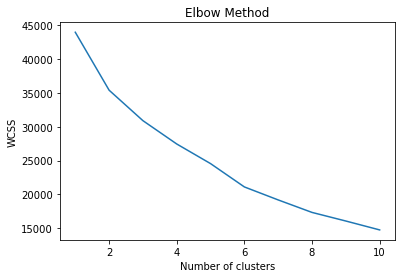

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airlines1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
cluster=KMeans(15,random_state=42)
cluster.fit(scaled_Airlines1_df)

KMeans(n_clusters=15, random_state=42)

In [45]:
cluster.labels_

array([13, 13, 13, ...,  4,  3,  3])

In [46]:
Airlines1['clusterid_new']=cluster.labels_

In [47]:
Airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,13
1,2,19244,0,1,1,1,215,2,0,0,6968,0,13
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,13
3,4,14776,0,1,1,1,500,1,0,0,6952,0,13
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,7
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,7
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [48]:
cluster.cluster_centers_

array([[-0.17801607, -0.1462149 , -0.08136198, -0.09824189, -0.06276658,
        -0.22369929,  0.57412514, -0.25423186, -0.28306851, -0.77242975,
        -0.7617422 ],
       [ 0.4903939 , -0.15832935,  1.1601518 , -0.09824189, -0.05104456,
         0.61694278,  0.5511873 , -0.20346737, -0.23546409,  0.47615348,
        -0.7669193 ],
       [ 0.33722894,  0.13916076, -0.44200889, -0.09824189, -0.06276658,
        -0.13802022,  0.47298501,  1.90580545,  1.97634703, -0.0403689 ,
         0.66777855],
       [-0.45424208, -0.1372978 , -0.75964078, -0.09824189, -0.06276658,
        -0.63513186, -0.89177252, -0.2546676 , -0.26575323, -1.01887239,
        -0.7669193 ],
       [-0.07985982, -0.09985849,  1.02660994, -0.09824189, -0.06276658,
         0.5133406 ,  0.62073922, -0.16409058, -0.18425591,  0.20349138,
         1.30391816],
       [ 6.44598525,  0.24512718,  1.06541053, -0.09824189, -0.06276658,
         1.65249395,  0.98692412,  0.591036  ,  0.95615482,  1.10075082,
         0.976

In [49]:
Airlines1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2900.972569,55755.870324,30.930175,1.950125,1,1.000000,11747.985037,17.104738,105.109726,0.301746,2527.007481,0.002494
1,1,1470.341743,123084.791284,21.685780,3.658257,1,1.002294,32084.692661,16.903670,174.449541,0.479358,5104.525229,0.000000
2,2,2094.398693,107581.549020,251.764706,1.450980,1,1.000000,13811.941176,16.143791,3128.248366,8.869281,4035.202614,0.692810
3,3,3181.104478,27830.503731,37.905473,1.013682,1,1.000000,1807.715174,3.038557,103.512438,0.365672,2014.713930,0.000000
4,4,1792.067290,65554.407477,66.867290,3.472897,1,1.000000,29540.968224,17.562617,230.323364,0.674766,4538.743925,1.000000
5,5,887.157895,723118.552632,333.736842,3.526316,1,1.000000,57049.184211,21.078947,1287.526316,5.000000,6391.473684,0.842105
6,6,1664.866667,138061.400000,78.800000,3.466667,1,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
7,7,1932.295181,54779.730924,107.353414,1.156627,1,1.000000,6055.987952,7.154618,267.070281,0.891566,4265.975904,1.000000
8,8,2057.307692,117147.384615,5781.788462,1.980769,1,1.000000,18364.480769,12.288462,938.788462,2.865385,3961.134615,0.500000


In [52]:
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(0, 'Cluster 1')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(1, 'Cluster 2')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(2, 'Cluster 3')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(3, 'Cluster 4')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(4, 'Cluster 5')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(5, 'Cluster 6')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(6, 'Cluster 7')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(7, 'Cluster 8')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(8, 'Cluster 9')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(9, 'Cluster 10')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(10, 'Cluster 11')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(11, 'Cluster 12')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(12, 'Cluster 13')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(13, 'Cluster 14')
Airlines1['clusterid_new']=Airlines1['clusterid_new'].replace(14, 'Cluster 15')
Airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 14
1,2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 14
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 14
3,4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 14
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 8
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 8
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 4


In [53]:
Airlines1['clusterid_new'].value_counts()

Cluster 4     804
Cluster 14    736
Cluster 5     535
Cluster 8     498
Cluster 2     436
Cluster 1     401
Cluster 10    224
Cluster 3     153
Cluster 12     60
Cluster 9      52
Cluster 6      38
Cluster 15     28
Cluster 7      15
Cluster 11     15
Cluster 13      4
Name: clusterid_new, dtype: int64

# DBSCAN Clustering

In [54]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [55]:
Airlines2=pd.read_csv("D:\\ExcelR Assignments\\Clustering\\EastWestAirlines.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [57]:
EWA=Airlines2.iloc[:,1:]
EWA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [59]:
array=EWA.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [60]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [188]:
dbscan = DBSCAN(eps=0.8, min_samples=16)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=16)

In [189]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [190]:
EWA['cluster']=pd.DataFrame(dbscan.labels_)
EWA

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [191]:
EWA['cluster'].value_counts()

 0    2111
-1    1043
 1     801
 2      44
Name: cluster, dtype: int64

In [193]:
metrics.silhouette_score(X,dbscan.labels_)

0.12592416548468255